You are given a generated regression dataset `D: (X, y)` along already split train and test subsets, `X_train, X_test, y_train, y_test`. You are also given the true underlying coefficients `coef`.

    Linear regression tasks
    -----------------------
    1. Build a linear regression model using sklearn.
    2. Compute the MSE on the train and test sets.
    3. Compare the true and learned coefficients.
    4. Plot the regression line for any two top coefficients.
    5. Describe what you have seen based on the experiements (minimum 150 words).

Resources:
1. [Linear Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. [Plotting](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#@title Data Generation (DO NOT MODIFY)
X, y, coef = make_regression(n_samples=500, n_features=15, n_informative=8, effective_rank=6.0, noise=3.0, coef=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# WRITE YOUR CODE STARTING HERE

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Residual
y_pred = model.predict(X_test)
residual = y_test - y_pred

y_pred_train = model.predict(X_train)
residual_train = y_train - y_pred_train


1. Linearity Check


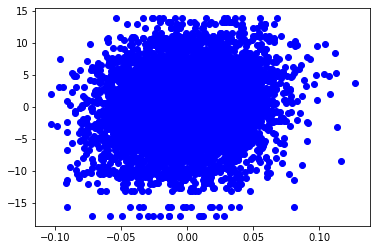

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,y, 'o', color = 'blue');


2. Normality Check

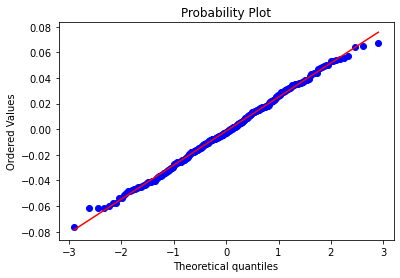

In [ ]:
import scipy.stats as stats
stats.probplot(X_train[:,0], dist="norm", plot=plt)
plt.show()

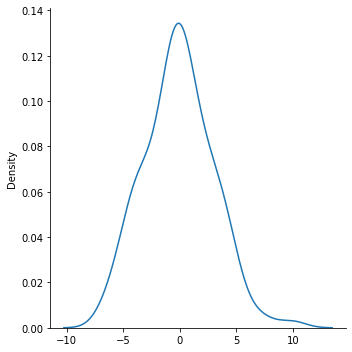

In [ ]:
import seaborn as sns
sns.displot(residual,kind='kde')

3. Multicolinaearity Check

In [ ]:
df = pd.DataFrame(X_train)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [ ]:
pd.DataFrame({'vif': vif}, index=df.columns[0:15]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
vif,1.410095,1.630633,1.392533,1.637292,1.663207,1.591131,1.574563,1.421737,1.560618,1.317408,1.590312,1.496162,1.475939,1.44255,1.387287


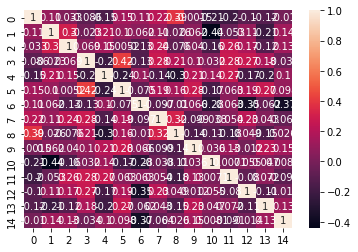

In [ ]:
import seaborn as sns
sns.heatmap(df.iloc[:,0:15].corr(),annot=True)

4. Homoscedasticity

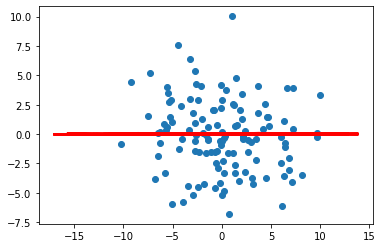

In [ ]:
plt.scatter(y_pred,residual)
plt.plot( y_train,X_train, color='red')

Applying linear regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
true_coefs = coef
true_coefs = pd.DataFrame(true_coefs)

In [ ]:
learned_coefs = reg.coef_
learned_coefs = pd.DataFrame(learned_coefs )

Comparision of True and Learned Coefficients:

In [ ]:
true_and_learned = [true_coefs,learned_coefs]
true_and_learned_df = pd.concat(true_and_learned, axis=1)
true_and_learned_df.columns = ['True Coefficients', 'Learned Coefficients']
true_and_learned_df

,True Coefficients,Learned Coefficients
0,69.564075,69.799756
1,0.000000,-9.344312
2,93.788698,102.704813
3,0.000000,-6.362925
4,8.920656,5.873092
5,0.000000,-1.691751
6,39.278565,42.876698
7,0.000000,-4.079342
8,36.524420,32.555763
9,21.115804,32.451670


Computing MSE for train and test sets

In [ ]:
#Test set MSE
import numpy as np
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE


9.15040786980671

In [ ]:
#Training set MSE
MSE_train = np.square(np.subtract(y_train,y_pred_train)).mean()
MSE_train

9.477015206695722

Plotting regression line for top two coefficients

In [ ]:
top_1 = true_and_learned_df.sort_values(by='Learned Coefficients', ascending=False)['Learned Coefficients'].index[0]
top_2 = true_and_learned_df.sort_values(by='Learned Coefficients', ascending=False)['Learned Coefficients'].index[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


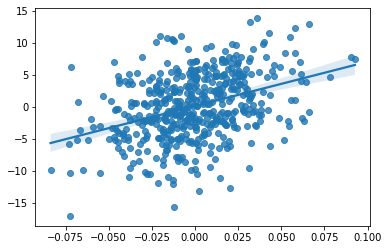

In [ ]:
sns.regplot(X[:, top_1], y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


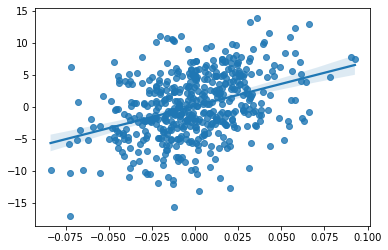

In [ ]:
sns.regplot(X[:, top_1], y)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
linreg = sm.OLS(y_train, X_train).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     45.57
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.40e-73
Time:                        04:22:42   Log-Likelihood:                -953.76
No. Observations:                 375   AIC:                             1940.
Df Residuals:                     359   BIC:                             2002.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1058      0.166      0.639      0.5

Analysis of Summary table of OLS Statsmodel:

1. When checked, R-squared and Adjusted R-squared values, there's no significant difference. Therefore, we can conclude all features are relevant to the final model and no need of omitting any features to fit the model. 

2. F-statistic value is used to find the significance of the overall regression model. As the probability of f-statistic value is sloe to zero in our case, we can conclude our model is bett than the intercept only model. And also, all the features in the model have linear relationship with the target variable. 

Analysis:

Three Assumptions of Linear Regression are: 
1. Multivariate Normal
2. No Multicollinarity
3. Homoscedasticity

The given synthetic dataset:
1. Is normally distributed. We chcked the normality using Probability plot(https://www.geeksforgeeks.org/normal-probability-plot/) and Normal Distribution Curve (https://www.statology.org/seaborn-normal-distribution/). IN both the checks, we found the given data is satisfying the multivariate normal assumption.

2. Has no multicollinearity. We checked the multicollinarity variance inflation factor and also confirmed the results by the heatmap (https://medium.com/analytics-vidhya/how-to-check-for-assumptions-in-a-linear-regression-a68116aef88a). None of the feature's vif value is above 5. So, we concluded the dataset has no multicollinearity. 

3. Satisfies Homoscedasticity assumption.A close observation of the obtained plot shows that variance of residual terms is distributed evenly for high and low fitted values. We checked this assumption by the scatter plot between predicted values and residuals. 

Mean squared error for test set: 9.15040786980671

Mean squared error for training set: 9.477015206695722

There is no significance difference in the MSE of training and test sets. 

Final coefficient values: [69.79975592, -9.3443124, 102.70481272, -6.36292528, 5.87309176, -1.69175087, 42.87669847, -4.07934221, 32.55576259, 32.45166987, 55.41335973, -6.7845724, 4.74741502, 68.70214188, 10.49642582]


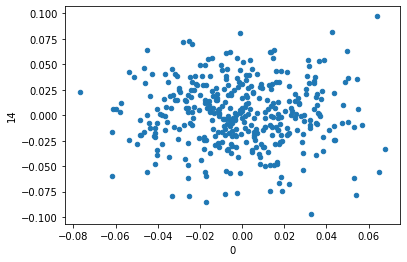

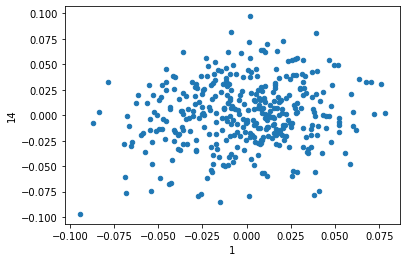

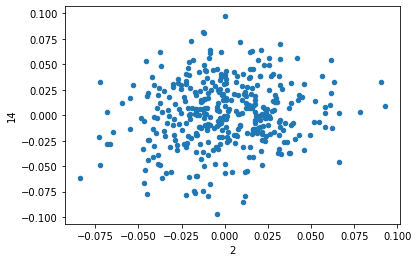

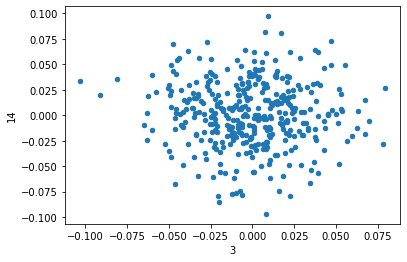

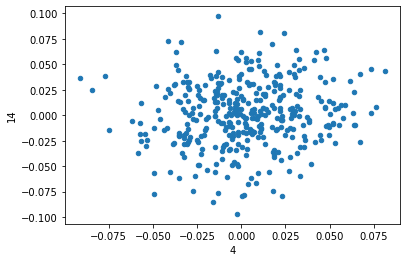

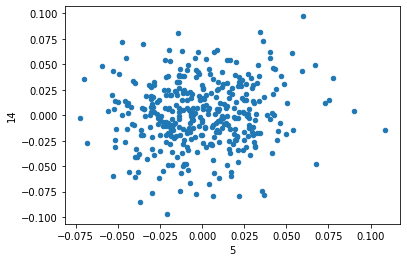

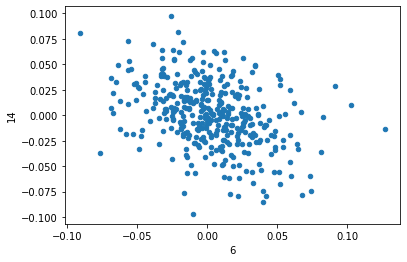

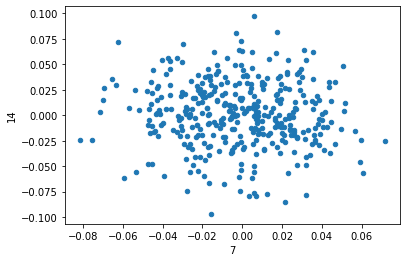

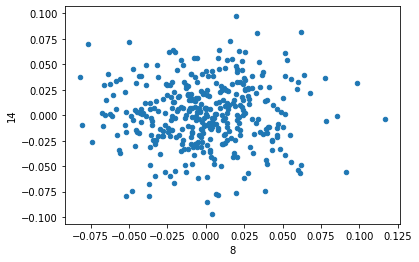

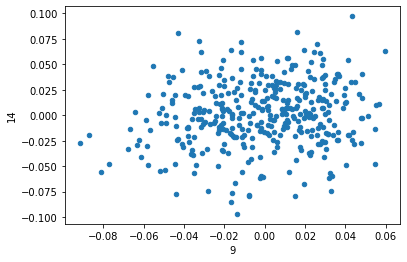

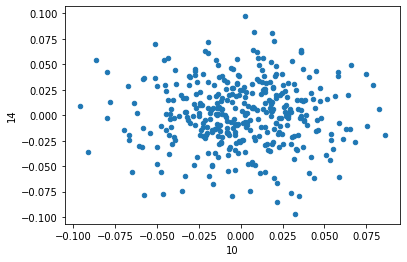

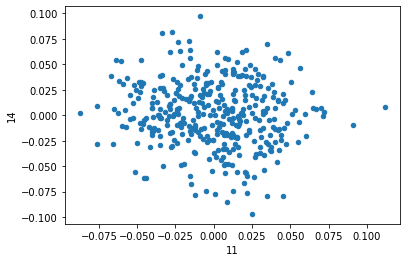

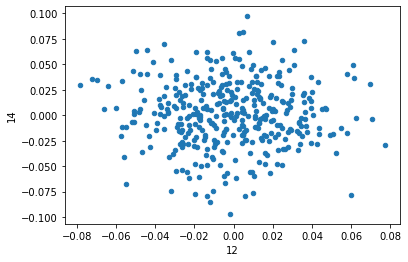

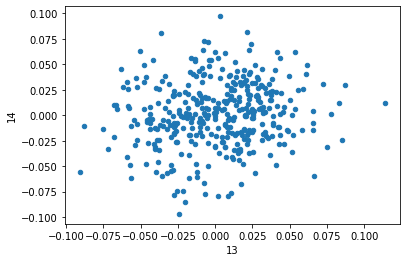

In [ ]:
#Linearity check for individual features
for i in range(14):
  df.plot.scatter(x=i, y=14)
  plt.show()